In [9]:
from h3 import h3

import pandas as pd

from shapely.geometry import Point,Polygon

from shapely.geometry import shape

import folium

# from cartoframes.viz import Map, Layer, color_continuous_style, palettes, histogram_widget

import numpy as np
import geopandas as gpd

# from cartoframes.viz import color_category_style, color_bins_style, popup_element, size_bins_style

# from cartoframes.viz import  basic_widget , category_widget

from shapely.geometry import shape, GeometryCollection

import time

import seaborn as sn

from sklearn.cluster import DBSCAN, KMeans

from matplotlib import pyplot as plt

from shapely import wkt

import geo_functions as gf

from business_models import hahn, greenplum

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [13]:
pop_layer = gpd.read_file('density_layer.geojson')

borders_jhb  = gpd.read_file('metropolitan municipality jhb.shp')

borders  = gpd.read_file('metropolitan municipality cpt.shp')
# gdf_pop_stat_cpt_jhb = gpd.read_file('pop_stat_cpt_jhb.geojson')
gdf_cpt_jhb_pop_100m_ward = gpd.read_file('cpt_jhb_pop_100m_ward.geojson')
pop_grid_best_wards = gpd.read_file('pop_grid_best_wards_clusters.geojson')

In [14]:
pop_grid_best_wards 

,pop,index_right,CAT_B,WARD_ID,x,y,cluster,geometry
0,2,111,JHB,79800112,28.078333,-25.922500,6,"POLYGON ((28.07792 -25.92208, 28.07792 -25.922..."
1,5,111,JHB,79800112,28.076667,-25.924166,6,"POLYGON ((28.07625 -25.92375, 28.07625 -25.924..."
2,2,111,JHB,79800112,28.080000,-25.925000,6,"POLYGON ((28.07958 -25.92458, 28.07958 -25.925..."
3,2,111,JHB,79800112,28.084167,-25.925000,6,"POLYGON ((28.08375 -25.92458, 28.08375 -25.925..."
4,5,111,JHB,79800112,28.085000,-25.925000,6,"POLYGON ((28.08458 -25.92458, 28.08458 -25.925..."
...,...,...,...,...,...,...,...,...
57615,8,202,CPT,19100073,18.463333,-34.042500,4,"POLYGON ((18.46292 -34.04208, 18.46292 -34.042..."
57616,30,202,CPT,19100073,18.464167,-34.042916,4,"POLYGON ((18.46375 -34.04208, 18.46375 -34.043..."
57617,33,202,CPT,19100073,18.465833,-34.042500,4,"POLYGON ((18.46542 -34.04208, 18.46542 -34.042..."
57618,5,202,CPT,19100073,18.466667,-34.042500,4,"POLYGON ((18.46625 -34.04208, 18.46625 -34.042..."


In [4]:
pop_layer.columns

Index(['Density per 1 km', 'geometry'], dtype='object')

In [5]:
pop_layer= pop_layer[pop_layer['Density per 1 km'] >0]

In [6]:
pop_layer.shape

(800732, 2)

<AxesSubplot:>

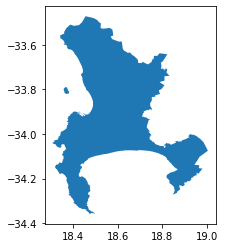

In [8]:
borders.plot()

In [9]:
xf.head()

,OBJECTID,CATEGORY,CAT2,CAT_B,MUNICNAME,DISTRICT,PROVINCE,PROVNAME,AREA,SHAPE_LENG,SHAPE_AREA,EA_NUMBER,geometry
0,2,A,Metropolitan Municipality,CPT,City of Cape Town,CPT,WC,Western Cape,2439.78,5.198175,0.238297,Metropolitan Municipality CPT,"MULTIPOLYGON (((18.37075 -33.82018, 18.37030 -..."


In [13]:
borders =borders.set_crs('epsg:4326')

In [19]:
pop_layer_capetown = pop_layer[pop_layer.geometry.within(borders.iloc[0].geometry)]

In [20]:
pop_layer_capetown.shape

(4410, 2)

<AxesSubplot:>

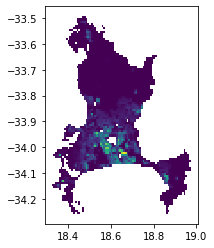

In [21]:
pop_layer_capetown.plot(column='Density per 1 km')

In [22]:
pop_layer_capetown.to_file('pop_density_capetown.geojson', driver='GeoJSON')

In [23]:
airbnb_capetown = pd.read_csv('listings.csv')

In [24]:
airbnb_capetown.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3191,https://www.airbnb.com/rooms/3191,20211026143401,2021-10-27,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,https://www.airbnb.com/users/show/3754,...,4.98,4.72,4.78,NaN,f,1,1,0,0,0.56
1,15007,https://www.airbnb.com/rooms/15007,20211026143401,2021-10-27,Blaauwberg House,Welcome to our self-catering beach-front famil...,"Bloubergstrand is a lovely, cosy suburb near C...",https://a0.muscache.com/pictures/3b654aa4-248e...,59072,https://www.airbnb.com/users/show/59072,...,4.93,4.93,4.83,NaN,f,2,2,0,0,0.63
2,15077,https://www.airbnb.com/rooms/15077,20211026143401,2021-10-27,Top relaxed beach living in style,Situated either on the ground floor with direc...,It is probably the best hub in order to explor...,https://a0.muscache.com/pictures/4a8fceaa-655e...,59342,https://www.airbnb.com/users/show/59342,...,4.80,4.80,5.00,NaN,f,5,1,4,0,0.06
3,15199,https://www.airbnb.com/rooms/15199,20211026143401,2021-10-26,Self catering apartment,<b>The space</b><br />Amenities :<br />Welcome...,NaN,https://a0.muscache.com/pictures/142776/5b6c9e...,59694,https://www.airbnb.com/users/show/59694,...,5.00,5.00,4.00,NaN,f,1,1,0,0,0.02
4,15285,https://www.airbnb.com/rooms/15285,20211026143401,2021-10-27,Waterford-Guinea Fowl Self Catering,Our returning guests are a testament to the re...,Constantia is home to the earliest wine farms ...,https://a0.muscache.com/pictures/7b09362c-5a62...,59964,https://www.airbnb.com/users/show/59964,...,5.00,4.89,4.89,NaN,f,3,2,0,0,0.08


In [27]:
airbnb_capetown['geometry'] = gf.get_points(airbnb_capetown.latitude,airbnb_capetown.longitude)

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [29]:
gdf_airbnb_capetown = gf.get_gdf(airbnb_capetown,'geometry',4326)

<AxesSubplot:>

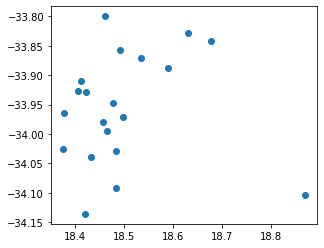

In [30]:
gdf_airbnb_capetown.head(20).plot()

In [32]:
grid_pop_airbnb = gpd.sjoin(pop_layer_capetown,gdf_airbnb_capetown, op='contains',how='left')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [37]:
grid_pop_airbnb['flg_airbnb'] = grid_pop_airbnb['id'].isnull()==False

In [41]:
grid_pop_airbnb['price'] = grid_pop_airbnb['price'].fillna(0)

In [43]:
grid_pop_airbnb.reset_index(inplace=True)

In [44]:
grid_pop_airbnb

,index,Density per 1 km,geometry,index_right,id,listing_url,scrape_id,last_scraped,name,description,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,flg_airbnb
0,377456,2,"POLYGON ((18.46542 -33.49208, 18.46542 -33.500...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,377813,3,"POLYGON ((18.44042 -33.50042, 18.44042 -33.508...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,377814,2,"POLYGON ((18.44875 -33.50042, 18.44875 -33.508...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,377815,78,"POLYGON ((18.46542 -33.50042, 18.46542 -33.508...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,377816,121,"POLYGON ((18.47375 -33.50042, 18.47375 -33.508...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25361,813854,2,"POLYGON ((18.43208 -34.24208, 18.43208 -34.250...",9676.0,33388612.0,https://www.airbnb.com/rooms/33388612,2.021103e+13,2021-10-27,"Moon Wagon on Lalaphanzi Farm, in Cape Point, SA.","Situated on a farm at the tip of Africa, this ...",...,5.0,4.79,NaN,f,2.0,0.0,2.0,0.0,0.45,True
25362,813855,1,"POLYGON ((18.44042 -34.24208, 18.44042 -34.258...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
25363,813856,10,"POLYGON ((18.46542 -34.24208, 18.46542 -34.250...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
25364,813859,4,"POLYGON ((18.85708 -34.24208, 18.85708 -34.258...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [55]:
grid_pop_airbnb['price'] = grid_pop_airbnb['price'].apply(lambda x: float(x[1:].replace(',','')) if str(x)[0]=='$' else x)

<AxesSubplot:ylabel='Frequency'>

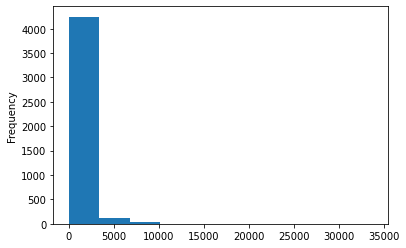

In [57]:
grid_pop_airbnb.groupby('index')['price'].mean().plot(kind='hist')

In [59]:
grid_pop_airbnb['index'].value_counts()

802245    649
393490    649
393124    388
801879    388
393874    296
         ... 
400572      1
400573      1
400574      1
400575      1
813964      1
Name: index, Length: 4410, dtype: int64

In [63]:
grid_data_capetown = pop_layer_capetown.join(grid_pop_airbnb.groupby('index')['price'].agg(['mean','count']))

In [64]:
grid_data_capetown.to_file('grid_data_capetown.geojson', driver='GeoJSON')

In [ ]:
grid_pop_airbnb.groupby('index')['price'].mean()

In [9]:
borders_jhb=borders_jhb.set_crs('epsg:4326')

In [10]:
pop_layer_jhb = pop_layer[pop_layer.geometry.within(borders_jhb.iloc[0].geometry)]

NameError: name 'pop_layer' is not defined

In [11]:
pop_layer_jhb.plot()

NameError: name 'pop_layer_jhb' is not defined

In [12]:
pop_layer_jhb.sum()

NameError: name 'pop_layer_jhb' is not defined

In [71]:
pop_layer_jhb

,Density per 1 km,geometry
85073,12,"POLYGON ((27.94875 -25.90875, 27.94875 -25.917..."
85467,12,"POLYGON ((27.94042 -25.91708, 27.94042 -25.925..."
85468,1,"POLYGON ((27.94875 -25.91708, 27.94875 -25.942..."
85895,39415,"POLYGON ((28.00708 -25.92542, 28.00708 -25.933..."
85896,35406,"POLYGON ((28.01542 -25.92542, 28.01542 -25.933..."


In [70]:
pop_layer_capetown.sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Density per 1 km    12748144
dtype: int64

In [72]:
!pip3 install pyreadstat 

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.yandex-team.ru/simple
     |████████████████████████████████| 2.4 MB 1.2 MB/s            


In [3]:
import pyreadstat

In [4]:
df = pyreadstat.read_sav('sa-census-2011-household-v1.1-20140618.sav')

In [5]:
df = df[0]

In [6]:
df.columns

Index(['QN_TYPE', 'SN', 'H01_QUARTERS', 'H02_MAINDWELLING',
       'H02_OTHERDWELLING', 'H02A_ROOF', 'H02A_WALL', 'H03_DININGROOMS',
       'H03_LIVINGROOMS', 'H03_DINING_LIVING', 'H03_BEDROOMS',
       'H03_STUDYROOMS', 'H03_MULTIPLE_USE', 'H03_OTHERROOMS', 'H03_TOTROOMS',
       'H04_TENURE', 'H07_WATERPIPED', 'H08_WATERSOURCE', 'H09_WATERSUPPLY',
       'H09A_WATERSUPPLY', 'H09B_ALT_WATERSOURCE', 'H10_TOILET',
       'H11_ENERGY_COOKING', 'H11_ENERGY_HEATING', 'H11_ENERGY_LIGHTING',
       'H12_REFUSE', 'H13_REFRIDGERATOR', 'H13_STOVE', 'H13_VACUUM',
       'H13_WASHINGM', 'H13_COMPUTER', 'H13_SATELLITE', 'H13_DVD_PLAYER',
       'H13_MOTORCAR', 'H13_TV', 'H13_RADIO', 'H13_LANDLINE', 'H13_CELLPHONE',
       'H13_POSTBOX', 'H13_RESIDENTIAL_MAIL', 'H13A_INTERNET', 'HM00_DEATHS',
       'HM00A_DEATHSNO', 'DERH_HHAGE', 'DERH_HHPOP', 'DERH_HHSEX',
       'DERH_HINCOME', 'DERH_HH_EMPLOY_STATUS', 'DERH_HSIZE', 'DERH_XPOP',
       'DERH_INCOME_CLASS', 'H_GEOTYPE', 'H_PROVINCE', 'H_DISTRICT'

In [7]:
df_cpt_jhb = df[df['H_MUNIC'].isin([199,798])]

In [14]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Распределение по типам доступа в интернет')

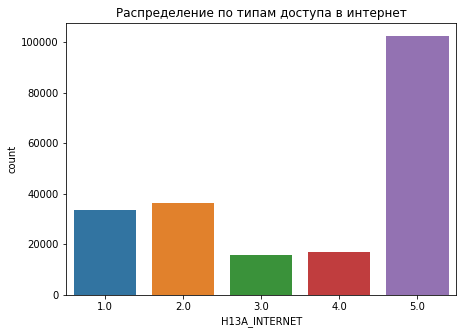

In [21]:
plt.figure(figsize=(7,5))
sns.countplot(df_cpt_jhb['H13A_INTERNET']);
plt.title('Распределение по типам доступа в интернет')
# 1 - home, 2- cell phone, 5 - no

In [230]:
df_cpt_jhb[df_cpt_jhb['H13A_INTERNET']==2].groupby('H_MUNIC').size()

H_MUNIC
199.0    14408
798.0    21789
dtype: int64

In [231]:
df_cpt_jhb.groupby('H_MUNIC')['DERH_HINCOME'].mean()

H_MUNIC
199.0    101004.545369
798.0    120054.393635
Name: DERH_HINCOME, dtype: float64

In [157]:
df['SN'].nunique()

1194122

In [158]:
df.shape

(1194122, 56)

In [172]:
df_cpt_jhb.groupby('H_MUNIC').size()

H_MUNIC
199.0     87482
798.0    117543
dtype: int64

In [173]:
3.7/4.4

0.8409090909090908

In [174]:
87/117

0.7435897435897436

In [ ]:
df_cpt_jhb.groupby('H_MUNIC')

In [88]:
borders_jhb.to_file('borders_jhb.geojson', driver='GeoJSON')

In [90]:
borders.to_file('borders_cpt.geojson', driver='GeoJSON')

In [92]:
pop_stat = gpd.read_file('Census 2011 WardLvl Dwellings Geo_region.shp')

In [94]:
pop_stat['Total_Dwel'].sum()

14449486

In [100]:
pop_stat['Ward_ID'].nunique()

4277

In [ ]:
pop_stat['Ward_ID']

In [95]:
wards = gpd.read_file('WD_SA_2011.shp')

In [103]:
pop_stat = pop_stat.merge(wards, left_on='Ward_ID', right_on='WARD_ID')

In [107]:
pop_stat['CAT_B'].unique()

array(['EC101', 'EC102', 'EC103', 'EC104', 'EC105', 'EC106', 'EC107',
       'EC108', 'EC109', 'EC121', 'EC122', 'EC123', 'EC124', 'EC126',
       'EC127', 'EC128', 'EC131', 'EC132', 'EC133', 'EC134', 'EC135',
       'EC136', 'EC137', 'EC138', 'EC141', 'EC142', 'EC143', 'EC144',
       'EC153', 'EC154', 'EC155', 'EC156', 'EC157', 'EC441', 'EC442',
       'EC443', 'EC444', 'BUF', 'NMA', 'FS161', 'FS162', 'FS163', 'FS164',
       'FS181', 'FS182', 'FS183', 'FS184', 'FS185', 'FS191', 'FS192',
       'FS193', 'FS194', 'FS195', 'FS196', 'FS201', 'FS203', 'FS204',
       'FS205', 'MAN', 'GT421', 'GT422', 'GT423', 'GT481', 'GT482',
       'GT483', 'GT484', 'EKU', 'JHB', 'TSH', 'KZN213', 'KZN214',
       'KZN215', 'KZN216', 'KZN211', 'KZN212', 'KZN221', 'KZN222',
       'KZN223', 'KZN224', 'KZN225', 'KZN226', 'KZN227', 'KZN232',
       'KZN233', 'KZN234', 'KZN235', 'KZN236', 'KZN271', 'KZN272',
       'KZN273', 'KZN274', 'KZN275', 'KZN282', 'KZN286', 'KZN281',
       'KZN283', 'KZN284', 'KZN28

In [108]:
pop_stat_cpt_jhb = pop_stat[pop_stat['CAT_B'].isin(['CPT','JHB'])]

In [110]:
pop_stat_cpt_jhb.groupby('CAT_B')['Total_Dwel'].sum()

CAT_B
CPT    1068563
JHB    1434860
Name: Total_Dwel, dtype: int64

In [117]:
gdf_pop_stat_cpt_jhb = gf.get_gdf(pop_stat_cpt_jhb,'geometry_y', 4326)

In [120]:
gdf_pop_stat_cpt_jhb.columns

Index(['Ward_ID', 'Total_Dwel', 'Urban_area', 'Tribal_or_', 'Farm',
       'House_or_b', 'Traditiona', 'Flat_or_ap', 'Cluster_ho', 'Townhouse_',
       'Semi_detac', 'House_flat', 'Informal_d', 'Informal00', 'Room_flatl',
       'Caravan_te', 'Other', 'Unspecifie', 'Not_applic', 'Rented',
       'Owned_but_', 'Occupied_r', 'Owned_and_', 'Other1', 'AHHI_No_in',
       'AHHI_R_1__', 'AHHI_R_480', 'AHHI_R_960', 'AHHI_R_19_', 'AHHI_R_38_',
       'AHHI_R_76_', 'AHHI_R_153', 'AHHI_R_307', 'AHHI_R_614', 'AHHI_R_1_2',
       'AHHI_R_2_4', 'AHHI_Unspe', 'HH_Size_1', 'HH_Size_2', 'HH_Size_3',
       'HH_Size_4', 'HH_Size_5', 'HH_Size_6', 'HH_Size_7', 'HH_Size_8',
       'HH_Size_9', 'HH_Size_10', '_Object', 'geometry_x', 'OBJECTID',
       'PROVINCE', 'CAT_B', 'WARDNO', 'WARD_ID', 'WD_CODE_st', 'SUM_WARD_P',
       'SHAPE_LENG', 'WARD_EXT', 'ALBERS_ARE', 'SHAPE_Le_1', 'SHAPE_Area',
       'geometry_y'],
      dtype='object')

In [122]:
gdf_pop_stat_cpt_jhb[['Ward_ID', 'Total_Dwel', 'Urban_area', 'Tribal_or_', 'Farm',
       'House_or_b', 'Traditiona', 'Flat_or_ap', 'Cluster_ho', 'Townhouse_',
       'Semi_detac', 'House_flat', 'Informal_d', 'Informal00', 'Room_flatl',
       'Caravan_te', 'Other', 'Unspecifie', 'Not_applic', 'Rented',
       'Owned_but_', 'Occupied_r', 'Owned_and_', 'Other1', 'AHHI_No_in',
       'AHHI_R_1__', 'AHHI_R_480', 'AHHI_R_960', 'AHHI_R_19_', 'AHHI_R_38_',
       'AHHI_R_76_', 'AHHI_R_153', 'AHHI_R_307', 'AHHI_R_614', 'AHHI_R_1_2',
       'AHHI_R_2_4', 'AHHI_Unspe', 'HH_Size_1', 'HH_Size_2', 'HH_Size_3',
       'HH_Size_4', 'HH_Size_5', 'HH_Size_6', 'HH_Size_7', 'HH_Size_8',
       'HH_Size_9', 'HH_Size_10',
       'PROVINCE', 'CAT_B', 'WARDNO', 'WARD_ID', 'WD_CODE_st', 'SUM_WARD_P',
       'SHAPE_LENG', 'WARD_EXT', 'ALBERS_ARE', 'SHAPE_Le_1', 'SHAPE_Area',
       'geometry_y']].to_file('pop_stat_cpt_jhb.geojson', driver='GeoJSON')

In [123]:
pop_stat =  gpd.read_file('Census 2011 WardLvl Pop Labour Force_region.shp')

In [125]:
pop_stat.columns

Index(['Ward_ID', 'Pop', 'Black_Afri', 'Coloured', 'Indian_or_', 'White',
       'Other', 'Gade_0', 'Grade_1___', 'Grade_2___', 'Grade_3___',
       'Grade_4___', 'Grade_5___', 'Grade_6___', 'Grade_7___', 'Grade_8___',
       'Grade_9___', 'Grade_10__', 'Grade_11__', 'Grade_12__', 'NTC_I___N1',
       'NTC_II___N', 'NTC_III__N', 'N4___NTC_4', 'N5__NTC_5', 'N6___NTC_6',
       'Certificat', 'Diploma_wi', 'Certific00', 'Diploma_00', 'Higher_Dip',
       'Post_Highe', 'Bachelors_', 'Bachelor00', 'Honours_de', 'Higher_Deg',
       'Other1', 'No_schooli', 'Unspecifie', 'Not_applic', 'PMI_No_inc',
       'PMI_R_1___', 'PMI_R_401_', 'PMI_R_801_', 'PMI_R_1_60', 'PMI_R_3_20',
       'PMI_R_6_40', 'PMI_R_12_8', 'PMI_R_25_6', 'PMI_R51201', 'PMI_R10240',
       'PMI_R20480', 'PMI_Unspec', 'PMI_NotApp', 'Employed', 'Unemployed',
       'Discourage', 'Other_NotE', 'Age_Lessth', 'Employment', 'FormalSect',
       'InformalSe', 'Private_ho', 'Do_not_kno', 'Unsepcifie', 'Sector_Not',
       'geometry']

In [126]:
gdf_pop_stat_cpt_jhb = gdf_pop_stat_cpt_jhb.merge(pop_stat, on='Ward_ID', how='left')

In [127]:
gdf_pop_stat_cpt_jhb.shape

(241, 128)

In [128]:
gdf_pop_stat_cpt_jhb.columns

Index(['Ward_ID', 'Total_Dwel', 'Urban_area', 'Tribal_or_', 'Farm',
       'House_or_b', 'Traditiona', 'Flat_or_ap', 'Cluster_ho', 'Townhouse_',
       ...
       'Other_NotE', 'Age_Lessth', 'Employment', 'FormalSect', 'InformalSe',
       'Private_ho', 'Do_not_kno', 'Unsepcifie', 'Sector_Not', 'geometry'],
      dtype='object', length=128)

In [130]:
gdf_pop_stat_cpt_jhb[[ i for i in gdf_pop_stat_cpt_jhb.columns if 'geometry' not in i]+['geometry_y']].to_file('pop_stat_cpt_jhb.geojson', driver='GeoJSON')

In [131]:
gdf_pop_stat_cpt_jhb.groupby('CAT_B')['Pop'].sum()

CAT_B
CPT    3740025
JHB    4434821
Name: Pop, dtype: int64

In [134]:
gdf_pop_stat_cpt_jhb['area_metres' ] = gdf_pop_stat_cpt_jhb.geometry_y.to_crs('epsg:22289').area

(array([225.,  10.,   1.,   2.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([2.07506396e+05, 4.99543292e+07, 9.97011521e+07, 1.49447975e+08,
        1.99194798e+08, 2.48941621e+08, 2.98688444e+08, 3.48435266e+08,
        3.98182089e+08, 4.47928912e+08, 4.97675735e+08]),
 <BarContainer object of 10 artists>)

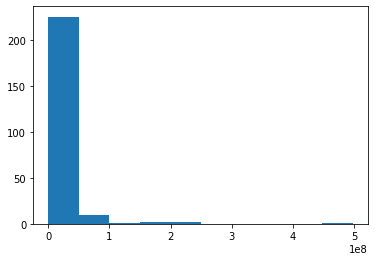

In [135]:
plt.hist(gdf_pop_stat_cpt_jhb['area_metres' ])

In [138]:
gdf_pop_stat_cpt_jhb.columns.tolist()

['Ward_ID',
 'Total_Dwel',
 'Urban_area',
 'Tribal_or_',
 'Farm',
 'House_or_b',
 'Traditiona',
 'Flat_or_ap',
 'Cluster_ho',
 'Townhouse_',
 'Semi_detac',
 'House_flat',
 'Informal_d',
 'Informal00',
 'Room_flatl',
 'Caravan_te',
 'Other_x',
 'Unspecifie_x',
 'Not_applic_x',
 'Rented',
 'Owned_but_',
 'Occupied_r',
 'Owned_and_',
 'Other1_x',
 'AHHI_No_in',
 'AHHI_R_1__',
 'AHHI_R_480',
 'AHHI_R_960',
 'AHHI_R_19_',
 'AHHI_R_38_',
 'AHHI_R_76_',
 'AHHI_R_153',
 'AHHI_R_307',
 'AHHI_R_614',
 'AHHI_R_1_2',
 'AHHI_R_2_4',
 'AHHI_Unspe',
 'HH_Size_1',
 'HH_Size_2',
 'HH_Size_3',
 'HH_Size_4',
 'HH_Size_5',
 'HH_Size_6',
 'HH_Size_7',
 'HH_Size_8',
 'HH_Size_9',
 'HH_Size_10',
 '_Object',
 'geometry_x',
 'OBJECTID',
 'PROVINCE',
 'CAT_B',
 'WARDNO',
 'WARD_ID',
 'WD_CODE_st',
 'SUM_WARD_P',
 'SHAPE_LENG',
 'WARD_EXT',
 'ALBERS_ARE',
 'SHAPE_Le_1',
 'SHAPE_Area',
 'geometry_y',
 'Pop',
 'Black_Afri',
 'Coloured',
 'Indian_or_',
 'White',
 'Other_y',
 'Gade_0',
 'Grade_1___',
 'Grade_2___',


In [146]:
gdf_pop_stat_cpt_jhb[gdf_pop_stat_cpt_jhb.columns[:15]].head(10)

,Ward_ID,Total_Dwel,Urban_area,Tribal_or_,Farm,House_or_b,Traditiona,Flat_or_ap,Cluster_ho,Townhouse_,Semi_detac,House_flat,Informal_d,Informal00,Room_flatl
0,79800001,12656,12658,0,0,8935,11,105,5,7,5,293,1990,1175,54
1,79800002,11920,11921,0,0,10841,43,56,6,4,51,130,345,361,39
2,79800003,8535,8535,0,0,6728,17,40,5,5,8,200,843,632,18
3,79800004,11589,11589,0,0,7145,13,29,33,5,9,218,896,3044,54
4,79800005,14828,14731,0,97,9034,30,64,5,4,114,245,2113,3031,22
5,79800006,12434,12250,0,186,3165,175,77,9,15,43,107,1951,6509,30
6,79800007,10669,10669,0,0,6603,21,156,47,38,14,393,1652,1636,60
7,79800008,14151,14113,0,39,3414,85,111,35,21,62,172,1614,8525,15
8,79800009,6975,6976,0,0,5557,19,618,18,14,64,495,90,26,32
9,79800010,9674,9674,0,0,4513,39,424,32,16,16,284,677,3549,76


In [151]:
gdf_pop_stat_cpt_jhb[gdf_pop_stat_cpt_jhb.columns[3:17]].head(10).sum(axis=1)

0    12656
1    11920
2     8535
3    11589
4    14925
5    12620
6    10669
7    14190
8     6975
9     9674
dtype: int64

In [169]:
gdf_pop_stat_cpt_jhb[gdf_pop_stat_cpt_jhb.columns[22:32]]

,Owned_and_,Other1_x,AHHI_No_in,AHHI_R_1__,AHHI_R_480,AHHI_R_960,AHHI_R_19_,AHHI_R_38_,AHHI_R_76_,AHHI_R_153
0,6684,790,2486,997,1436,2186,2715,1780,741,242
1,5873,549,2238,757,1168,2086,2680,1893,748,243
2,4366,318,1391,574,854,1587,1977,1349,517,192
3,5311,1994,2816,653,955,1894,2434,1709,741,262
4,4932,1262,3166,1172,1646,2809,3105,1927,677,227
...,...,...,...,...,...,...,...,...,...,...
236,2815,98,1150,75,115,286,584,1243,2612,3977
237,4814,885,3506,1123,1537,2895,4377,2438,1081,361
238,4963,192,1268,198,379,1233,2024,2051,1326,658
239,2046,194,766,66,100,643,890,1147,1144,812


In [178]:
cols_analyse = ['Ward_ID',
 'Total_Dwel',
 'Farm',
 'House_or_b',
 'Flat_or_ap',
 'Cluster_ho',
 'Townhouse_',
 'Semi_detac',
 'Informal_d',
 'Informal00',
 'Owned_but_',
 'Owned_and_',
 'HH_Size_1',
 'HH_Size_2',
 'HH_Size_3',
 'HH_Size_4',
 'HH_Size_5',
 'HH_Size_6',
 'HH_Size_7',
 'HH_Size_8',
 'HH_Size_9',
 'HH_Size_10',
 'Pop',
 'Black_Afri',
 'Coloured',
 'Indian_or_',
 'White',
 'NTC_I___N1',
 'NTC_II___N',
 'NTC_III__N',
 'N4___NTC_4',
 'N5__NTC_5',
 'N6___NTC_6',
 'Certificat',
 'Diploma_wi',
 'Certific00',
 'Diploma_00',
 'Higher_Dip',
 'Post_Highe',
 'Bachelors_',
 'Bachelor00',
 'Honours_de',
 'Higher_Deg',
 'No_schooli',
 'Employed',
 'Unemployed']

In [180]:
gdf_pop_stat_cpt_jhb = gdf_pop_stat_cpt_jhb[cols_analyse]

,Ward_ID,Total_Dwel,Farm,House_or_b,Flat_or_ap,Cluster_ho,Townhouse_,Semi_detac,Informal_d,Informal00,...,Diploma_00,Higher_Dip,Post_Highe,Bachelors_,Bachelor00,Honours_de,Higher_Deg,No_schooli,Employed,Unemployed
0,79800001,12656,0,8935,105,5,7,5,1990,1175,...,258,152,38,82,24,20,15,2104,10578,6678
1,79800002,11920,0,10841,56,6,4,51,345,361,...,230,116,20,67,39,18,15,1459,9872,6101
2,79800003,8535,0,6728,40,5,5,8,843,632,...,159,110,17,66,27,14,9,1838,7476,4679
3,79800004,11589,0,7145,29,33,5,9,896,3044,...,252,175,26,99,34,23,28,2004,9221,7231
4,79800005,14828,97,9034,64,5,4,114,2113,3031,...,186,137,32,67,37,26,25,2008,12093,8039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,19100107,16076,0,10744,3340,463,1121,172,13,41,...,2271,3711,433,2516,840,931,712,553,22887,1472
237,19100108,17470,0,8440,21,15,10,6,1538,7280,...,295,280,45,131,62,44,38,1085,15867,10301
238,19100109,9467,0,5482,629,9,4,1429,944,666,...,248,205,45,121,49,44,29,1050,12953,4635
239,19100110,6112,0,3811,618,9,6,972,465,10,...,336,362,60,238,65,98,46,477,10507,2452


In [ ]:
# жилье

In [195]:
gdf_pop_stat_cpt_jhb['informal_dwell_level'] = (gdf_pop_stat_cpt_jhb['Informal_d']+gdf_pop_stat_cpt_jhb['Informal00'])/gdf_pop_stat_cpt_jhb['Total_Dwel']

(array([120.,  42.,  24.,  15.,  10.,   9.,   7.,   9.,   3.,   2.]),
 array([5.25052505e-04, 8.68001010e-02, 1.73075150e-01, 2.59350198e-01,
        3.45625247e-01, 4.31900295e-01, 5.18175344e-01, 6.04450392e-01,
        6.90725441e-01, 7.77000489e-01, 8.63275538e-01]),
 <BarContainer object of 10 artists>)

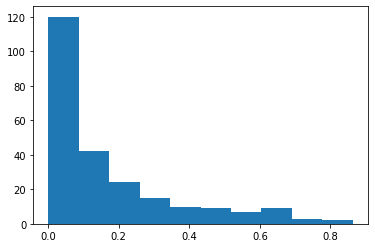

In [186]:
plt.hist(gdf_pop_stat_cpt_jhb['informal_dwell_share'])

In [185]:
gdf_pop_stat_cpt_jhb['formal_dwellings'] = gdf_pop_stat_cpt_jhb[['Farm',
 'House_or_b',
 'Flat_or_ap',
 'Cluster_ho',
 'Townhouse_',
 'Semi_detac']].sum(axis=1)

In [ ]:
### Население

In [191]:
gdf_pop_stat_cpt_jhb['employed_level'] = gdf_pop_stat_cpt_jhb['Employed']/gdf_pop_stat_cpt_jhb['Pop']

In [188]:
gdf_pop_stat_cpt_jhb['unemployed_level'] = gdf_pop_stat_cpt_jhb['Unemployed']/gdf_pop_stat_cpt_jhb['Pop']

In [192]:
gdf_pop_stat_cpt_jhb[['unemployed_level','employed_level']].corr()

,unemployed_level,employed_level
unemployed_level,1.000000,-0.753227
employed_level,-0.753227,1.000000


In [194]:
gdf_pop_stat_cpt_jhb['not_educated_level'] = gdf_pop_stat_cpt_jhb['No_schooli']/gdf_pop_stat_cpt_jhb['Pop']

In [196]:
gdf_pop_stat_cpt_jhb['white_level'] = gdf_pop_stat_cpt_jhb['White']/gdf_pop_stat_cpt_jhb['Pop']

In [199]:
gdf_pop_stat_cpt_jhb['higher_educ_level'] = gdf_pop_stat_cpt_jhb[['NTC_I___N1',
 'NTC_II___N',
 'NTC_III__N',
 'N4___NTC_4',
 'N5__NTC_5',
 'N6___NTC_6',
 'Certificat',
 'Diploma_wi',
 'Certific00',
 'Diploma_00',
 'Higher_Dip',
 'Post_Highe',
 'Bachelors_',
 'Bachelor00',
 'Honours_de',
 'Higher_Deg']].sum(axis=1)/gdf_pop_stat_cpt_jhb['Pop']

In [201]:
gdf_pop_stat_cpt_jhb['pop_per_dwelling'] = gdf_pop_stat_cpt_jhb['Pop']/gdf_pop_stat_cpt_jhb['Total_Dwel']

In [207]:
gdf_pop_stat_cpt_jhb['large_families_level'] = gdf_pop_stat_cpt_jhb[[
 'HH_Size_5',
 'HH_Size_6',
 'HH_Size_7',
 'HH_Size_8',
 'HH_Size_9',
 'HH_Size_10']].sum(axis=1)/gdf_pop_stat_cpt_jhb['Total_Dwel']

In [209]:
gdf_pop_stat_cpt_jhb.columns.tolist()

['Ward_ID',
 'Total_Dwel',
 'Urban_area',
 'Tribal_or_',
 'Farm',
 'House_or_b',
 'Traditiona',
 'Flat_or_ap',
 'Cluster_ho',
 'Townhouse_',
 'Semi_detac',
 'House_flat',
 'Informal_d',
 'Informal00',
 'Room_flatl',
 'Caravan_te',
 'Other_x',
 'Unspecifie_x',
 'Not_applic_x',
 'Rented',
 'Owned_but_',
 'Occupied_r',
 'Owned_and_',
 'Other1_x',
 'AHHI_No_in',
 'AHHI_R_1__',
 'AHHI_R_480',
 'AHHI_R_960',
 'AHHI_R_19_',
 'AHHI_R_38_',
 'AHHI_R_76_',
 'AHHI_R_153',
 'AHHI_R_307',
 'AHHI_R_614',
 'AHHI_R_1_2',
 'AHHI_R_2_4',
 'AHHI_Unspe',
 'HH_Size_1',
 'HH_Size_2',
 'HH_Size_3',
 'HH_Size_4',
 'HH_Size_5',
 'HH_Size_6',
 'HH_Size_7',
 'HH_Size_8',
 'HH_Size_9',
 'HH_Size_10',
 '_Object',
 'geometry_x',
 'OBJECTID',
 'PROVINCE',
 'CAT_B',
 'WARDNO',
 'WARD_ID',
 'WD_CODE_st',
 'SUM_WARD_P',
 'SHAPE_LENG',
 'WARD_EXT',
 'ALBERS_ARE',
 'SHAPE_Le_1',
 'SHAPE_Area',
 'geometry_y',
 'Pop',
 'Black_Afri',
 'Coloured',
 'Indian_or_',
 'White',
 'Other_y',
 'Gade_0',
 'Grade_1___',
 'Grade_2___',


In [225]:
gdf_pop_stat_cpt_jhb['dwell_density']= gdf_pop_stat_cpt_jhb['Total_Dwel']/(gdf_pop_stat_cpt_jhb['area_metres']/(10**6))

In [226]:
gdf_fin_cpt_jhb_wrd = gdf_pop_stat_cpt_jhb[['CAT_B',
 'WARDNO',
 'WARD_ID',
 'PROVINCE',
'Pop',
'Total_Dwel',

 'White',
'Employed', 
'geometry_y',
 'area_metres',
 'informal_dwell_share',
 'formal_dwellings',
 'unemployed_level',
 'employed_level',
 'not_educated_level',
 'informal_dwell_level',
 'white_level',
 'higher_educ_level',
 'pop_per_dwelling',
 'large_families_level', 'dwell_density']]

In [676]:
greenplum.write(gdf_fin_cpt_jhb_wrd,'snb_geo_lavka.wards_joburg_capetown')

In [221]:
sorted(gdf_fin_cpt_jhb_wrd.columns)

['CAT_B',
 'Employed',
 'PROVINCE',
 'Pop',
 'Total_Dwel',
 'WARDNO',
 'WARD_ID',
 'White',
 'area_metres',
 'employed_level',
 'formal_dwellings',
 'geometry_y',
 'higher_educ_level',
 'informal_dwell_level',
 'informal_dwell_share',
 'large_families_level',
 'not_educated_level',
 'pop_per_dwelling',
 'unemployed_level',
 'white_level']

In [227]:
gdf_fin_cpt_jhb_wrd.to_file('gdf_fin_cpt_jhb_wrd.geojson', driver='GeoJSON')

In [234]:
gdf_pop_stat_cpt_jhb['high_educ_num'] = gdf_pop_stat_cpt_jhb[['NTC_I___N1',
 'NTC_II___N',
 'NTC_III__N',
 'N4___NTC_4',
 'N5__NTC_5',
 'N6___NTC_6',
 'Certificat',
 'Diploma_wi',
 'Certific00',
 'Diploma_00',
 'Higher_Dip',
 'Post_Highe',
 'Bachelors_',
 'Bachelor00',
 'Honours_de',
 'Higher_Deg']].sum(axis=1)

In [239]:
gdf_pop_stat_cpt_jhb.groupby('CAT_B')['Unemployed'].sum()

CAT_B
CPT    405991
JHB    564972
Name: Unemployed, dtype: int64

In [240]:
gdf_pop_stat_cpt_jhb.groupby('CAT_B')['Employed'].sum()

CAT_B
CPT    1294242
JHB    1696521
Name: Employed, dtype: int64

In [241]:
gdf_pop_stat_cpt_jhb.groupby('CAT_B')['formal_dwellings'].sum()

CAT_B
CPT     815858
JHB    1054926
Name: formal_dwellings, dtype: int64

In [249]:
gdf_pop_stat_cpt_jhb.sort_values(['formal_dwellings','high_educ_num','Pop'], ascending=False)[['CAT_B','WARD_ID']].head(10)

,CAT_B,WARD_ID
111,JHB,79800112
96,JHB,79800097
52,JHB,79800053
236,CPT,19100107
99,JHB,79800100
112,JHB,79800113
102,JHB,79800103
152,CPT,19100023
232,CPT,19100103
105,JHB,79800106


In [20]:
import gc
gc.collect()

169

In [4]:
pop_grid = gpd.read_file('cpt_jhb_pop_100m.geojson')

KeyboardInterrupt: 

In [257]:
pop_grid =  gpd.sjoin(pop_grid,gdf_fin_cpt_jhb_wrd[['CAT_B','geometry_y','WARD_ID']],  op='intersects')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [259]:
pop_grid.to_file('cpt_jhb_pop_100m_ward.geojson')

In [5]:
pop_grid=  gpd.read_file('cpt_jhb_pop_100m_ward.geojson')

In [260]:
pop_grid.shape

(219984, 5)

In [4]:
pop_grid['5000_buffer'] = pop_grid.geometry.to_crs('epsg:22289').apply(lambda x : x.centroid.buffer(5000))

In [5]:
pop_grid['5000_buffer'] = pop_grid['5000_buffer'].to_crs('epsg:4326')

In [6]:
pop_grid.drop('index_right', inplace=True, axis=1)

In [6]:
gdf_fin_cpt_jhb_wrd = gpd.read_file('gdf_fin_cpt_jhb_wrd.geojson', driver='GeoJSON')

gdf_fin_cpt_jhb_wrd_bests = gdf_fin_cpt_jhb_wrd[(gdf_fin_cpt_jhb_wrd.informal_dwell_level<=0.1)&
                                 (gdf_fin_cpt_jhb_wrd.higher_educ_level>=0.2)&
                                 (gdf_fin_cpt_jhb_wrd.employed_level>=0.3)
                                ]

best_wards= gdf_fin_cpt_jhb_wrd[(gdf_fin_cpt_jhb_wrd.informal_dwell_level<=0.1)&
                                 (gdf_fin_cpt_jhb_wrd.higher_educ_level>=0.3)&
                                 (gdf_fin_cpt_jhb_wrd.employed_level>=0.45)
                                ]['WARD_ID']
pop_grid_best_wards = pop_grid[pop_grid['WARD_ID'].isin(best_wards)]

In [9]:
pop_grid_best_wards

,pop,index_right,CAT_B,WARD_ID,geometry
8727,2,111,JHB,79800112,"POLYGON ((28.07792 -25.92208, 28.07792 -25.922..."
8728,5,111,JHB,79800112,"POLYGON ((28.07625 -25.92375, 28.07625 -25.924..."
8729,2,111,JHB,79800112,"POLYGON ((28.07958 -25.92458, 28.07958 -25.925..."
8730,2,111,JHB,79800112,"POLYGON ((28.08375 -25.92458, 28.08375 -25.925..."
8731,5,111,JHB,79800112,"POLYGON ((28.08458 -25.92458, 28.08458 -25.925..."
...,...,...,...,...,...
193551,8,202,CPT,19100073,"POLYGON ((18.46292 -34.04208, 18.46292 -34.042..."
193552,30,202,CPT,19100073,"POLYGON ((18.46375 -34.04208, 18.46375 -34.043..."
193553,33,202,CPT,19100073,"POLYGON ((18.46542 -34.04208, 18.46542 -34.042..."
193554,5,202,CPT,19100073,"POLYGON ((18.46625 -34.04208, 18.46625 -34.042..."


In [14]:
pop_grid_inter = gpd.sjoin(pop_grid_best_wards.set_geometry('5000_buffer'), pop_grid_best_wards, how='inner', predicate='intersects',)

MemoryError: Unable to allocate 2.09 GiB for an array with shape (279918719,) and data type int64

In [18]:
pop_grid_best_wards.groupby('CAT_B').size()

CAT_B
CPT    14187
JHB    43433
dtype: int64

In [680]:
pop_grid['flag_good_place'] = 0
pop_grid.loc[pop_grid['WARD_ID'].isin(best_wards),'flag_good_place'] = 1

In [682]:
greenplum.write(pop_grid,'snb_geo_lavka.pop_joburg_capetown_raw')

In [49]:
 gdf_fin_cpt_jhb_wrd[(gdf_fin_cpt_jhb_wrd.informal_dwell_level<=0.1)&
                                 (gdf_fin_cpt_jhb_wrd.higher_educ_level>=0.3)&
                                 (gdf_fin_cpt_jhb_wrd.employed_level>=0.45)].groupby('CAT_B')['area_metres'].sum()/(10**6)

CAT_B
CPT    244.783675
JHB    486.854681
Name: area_metres, dtype: float64

In [53]:
245/(25*3.1415926)

3.119436937813006

In [54]:
486/(25*3.1415926)

6.18794429296784

In [22]:
pop_grid_best_wards[pop_grid_best_wards['pop']>30].groupby('CAT_B').size()

CAT_B
CPT    2126
JHB    6642
dtype: int64

In [ ]:
pop_grid_inter = gpd.sjoin(pop_grid_best_wards[pop_grid_best_wards['pop']>30].set_geometry('5000_buffer'), pop_grid_best_wards, how='inner', predicate='intersects',)

In [11]:
wealth_grid = gpd.read_file('grid_wealth_index_values.geojson', driver='GeoJSON')

In [12]:
wealth_grid

,id,left,top,right,bottom,rwi,geometry
0,330425,3.113266e+06,-2.987925e+06,3.115766e+06,-2.990425e+06,0.774,"MULTIPOLYGON (((27.96849 -25.91015, 27.96903 -..."
1,333657,3.125766e+06,-3.005425e+06,3.128266e+06,-3.007925e+06,0.960,"MULTIPOLYGON (((28.07923 -26.05121, 28.10169 -..."
2,330428,3.113266e+06,-2.995425e+06,3.115766e+06,-2.997925e+06,0.748,"MULTIPOLYGON (((27.96694 -25.97048, 27.98940 -..."
3,333019,3.123266e+06,-3.022925e+06,3.125766e+06,-3.025425e+06,1.165,"MULTIPOLYGON (((28.05677 -26.19236, 28.07923 -..."
4,327853,3.103266e+06,-3.007925e+06,3.105766e+06,-3.010425e+06,0.819,"MULTIPOLYGON (((27.87711 -26.07139, 27.89957 -..."
...,...,...,...,...,...,...,...
1098,336239,3.135766e+06,-3.010425e+06,3.138266e+06,-3.012925e+06,NaN,"MULTIPOLYGON (((28.18365 -26.09174, 28.18342 -..."
1099,336240,3.135766e+06,-3.012925e+06,3.138266e+06,-3.015425e+06,NaN,"MULTIPOLYGON (((28.17961 -26.11421, 28.17985 -..."
1100,336879,3.138266e+06,-2.997925e+06,3.140766e+06,-3.000425e+06,NaN,"MULTIPOLYGON (((28.21391 -25.99162, 28.21398 -..."
1101,336880,3.138266e+06,-3.000425e+06,3.140766e+06,-3.002925e+06,NaN,"MULTIPOLYGON (((28.19279 -26.01101, 28.19152 -..."


In [21]:
pop_grid_best_wards_wealth = gpd.sjoin(pop_grid_best_wards.drop('index_right', axis=1), wealth_grid[wealth_grid.rwi>=1], op='intersects', how='inner')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [22]:
pop_grid_best_wards_wealth.shape

(41818, 11)

In [23]:
pop_grid_best_wards_wealth.groupby('CAT_B').size()

CAT_B
CPT    10073
JHB    31745
dtype: int64

In [24]:
pop_grid_best_wards_wealth.groupby('CAT_B')['pop'].sum()

CAT_B
CPT    190183
JHB    619860
Name: pop, dtype: int64

In [25]:
pop_grid_best_wards_wealth.groupby('CAT_B')['rwi'].mean()

CAT_B
CPT    1.332676
JHB    1.296191
Name: rwi, dtype: float64

In [26]:
import seaborn as sns

<AxesSubplot:xlabel='rwi', ylabel='Count'>

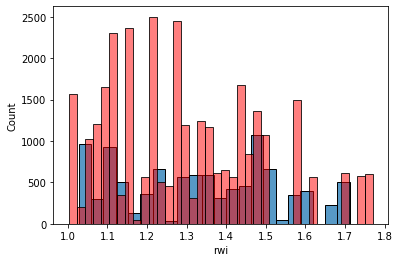

In [32]:
sns.histplot(pop_grid_best_wards_wealth[pop_grid_best_wards_wealth['CAT_B']=='CPT']['rwi'])
sns.histplot(pop_grid_best_wards_wealth[pop_grid_best_wards_wealth['CAT_B']=='JHB']['rwi'],color='red', alpha=0.5)

In [35]:
from sklearn.cluster import KMeans

In [68]:
 km= KMeans(n_clusters=7)

In [65]:
km10= KMeans(n_clusters=10)

In [57]:
pop_grid_best_wards

,pop,index_right,CAT_B,WARD_ID,geometry
8727,2,111,JHB,79800112,"POLYGON ((28.07792 -25.92208, 28.07792 -25.922..."
8728,5,111,JHB,79800112,"POLYGON ((28.07625 -25.92375, 28.07625 -25.924..."
8729,2,111,JHB,79800112,"POLYGON ((28.07958 -25.92458, 28.07958 -25.925..."
8730,2,111,JHB,79800112,"POLYGON ((28.08375 -25.92458, 28.08375 -25.925..."
8731,5,111,JHB,79800112,"POLYGON ((28.08458 -25.92458, 28.08458 -25.925..."
...,...,...,...,...,...
193551,8,202,CPT,19100073,"POLYGON ((18.46292 -34.04208, 18.46292 -34.042..."
193552,30,202,CPT,19100073,"POLYGON ((18.46375 -34.04208, 18.46375 -34.043..."
193553,33,202,CPT,19100073,"POLYGON ((18.46542 -34.04208, 18.46542 -34.042..."
193554,5,202,CPT,19100073,"POLYGON ((18.46625 -34.04208, 18.46625 -34.042..."


In [60]:
pop_grid_best_wards['x'] = pop_grid_best_wards.geometry.centroid.x
pop_grid_best_wards['y'] = pop_grid_best_wards.geometry.centroid.y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
/usr/local/lib/python3.7/dist-packages/geopandas/geodata

In [70]:
pop_grid_best_wards.loc[pop_grid_best_wards['CAT_B']=='JHB','cluster'] = km.fit_predict(pop_grid_best_wards.loc[pop_grid_best_wards['CAT_B']=='JHB',['x','y']])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<AxesSubplot:>

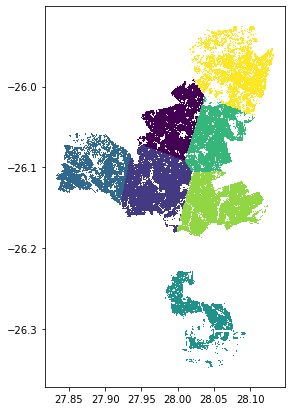

In [73]:
pop_grid_best_wards.loc[pop_grid_best_wards['CAT_B']=='JHB'].plot(column ='cluster', figsize=(12,7))

In [97]:
dict_clusters={0:pop_grid_best_wards[pop_grid_best_wards.cluster==0].unary_union.convex_hull,
 2:pop_grid_best_wards[pop_grid_best_wards.cluster==2].unary_union.convex_hull,
  3:pop_grid_best_wards[pop_grid_best_wards.cluster==3].unary_union.convex_hull,
 4:pop_grid_best_wards[pop_grid_best_wards.cluster==4].unary_union.convex_hull,
 5:pop_grid_best_wards[pop_grid_best_wards.cluster==5].unary_union.convex_hull,
 6:pop_grid_best_wards[pop_grid_best_wards.cluster==6].unary_union.convex_hull}

In [98]:
df_clusters = pd.DataFrame(pd.Series(dict_clusters))
df_clusters.columns = ['geometry']
gdf_clusters=gf.get_gdf(df_clusters, 'geometry', 4326)

In [100]:
gdf_clusters = gdf_clusters.join(pop_grid_best_wards[pop_grid_best_wards['CAT_B']=='JHB'].groupby('cluster')['pop'].sum())

In [101]:
gdf_clusters.to_file('gdf_clusters.geojson', driver='GeoJSON')

In [103]:
pop_grid_best_wards.to_file('pop_grid_best_wards_clusters.geojson', driver='GeoJSON')

### 2-ой способ spopt

In [104]:
!pip install -U spopt

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.yandex-team.ru/simple
     |████████████████████████████████| 81 kB 7.1 MB/s            


In [105]:
import spopt

In [106]:
import libpysal

In [159]:
w = libpysal.weights.Queen.from_dataframe(gdf_fin_cpt_jhb_wrd_bests)

/usr/local/lib/python3.7/dist-packages/libpysal/weights/_contW_lists.py:31: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(_get_boundary_points(part.boundary) for part in shape)))
/usr/local/lib/python3.7/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
 There is 1 island with id: 25.
  warnings.warn(message)


In [178]:
w

In [160]:
gdf_fin_cpt_jhb_wrd_bests.reset_index(inplace=True)

In [166]:
gdf_fin_cpt_jhb_wrd_bests['index'].nunique()

39

In [167]:
gdf_fin_cpt_jhb_wrd_bests.shape

(39, 25)

In [111]:
from spopt.region import MaxPHeuristic as MaxP

import numpy

In [169]:
RANDOM_SEED = 123456

##### Модель

In [187]:
threshold = 2
top_n = 1
gdf_fin_cpt_jhb_wrd_bests["count"] = 1
threshold_name = "count"
attrs_name = ["index"]

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


(array([ 4.,  8., 11.,  6.,  2.,  4.,  2.,  0.,  1.,  1.]),
 array([ 5353.,  6981.,  8609., 10237., 11865., 13493., 15121., 16749.,
        18377., 20005., 21633.]),
 <BarContainer object of 10 artists>)

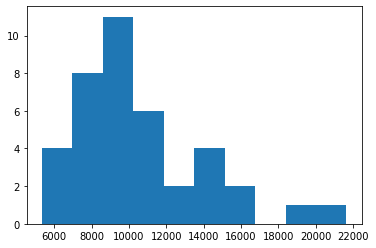

In [193]:
plt.hist(gdf_fin_cpt_jhb_wrd_bests.formal_dwellings)

In [440]:
gdf_fin_cpt_jhb_wrd_bests['area_km'] = gdf_fin_cpt_jhb_wrd_bests['area_metres']/(10**6)

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [188]:
numpy.random.seed(RANDOM_SEED)
model = MaxP(gdf_fin_cpt_jhb_wrd_bests[gdf_fin_cpt_jhb_wrd_bests['CAT_B']=='JHB'][['index','count','geometry']], w, attrs_name, threshold_name, threshold, top_n)
model.solve()

In [239]:
gdf_fin_cpt_jhb_wrd_bests_jhb = gdf_fin_cpt_jhb_wrd_bests[gdf_fin_cpt_jhb_wrd_bests['CAT_B']=='JHB']

In [240]:
gdf_fin_cpt_jhb_wrd_bests_jhb['cluster_new'] =  model.labels_

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [320]:
# input 1
top_n = 2
# gdf_fin_cpt_jhb_wrd_bests["count"] = 1
threshold_name_hsld = "formal_dwellings"
attrs_name = ["index"]

df = gdf_fin_cpt_jhb_wrd_bests[(gdf_fin_cpt_jhb_wrd_bests['CAT_B']=='JHB')& (gdf_fin_cpt_jhb_wrd_bests['WARD_ID'].isin(['79800023','79800054'])==False)][['index','geometry',"formal_dwellings",'White','Employed','Pop','area_km']]

w =  libpysal.weights.Rook.from_dataframe(df)

threshold_value = 20000

In [495]:
def calc_cluster_maxp(df, w, attrs_name, threshold_name, threshold_value, top_n):

    numpy.random.seed(RANDOM_SEED)
    model_pop = MaxP(df, w, attrs_name, threshold_name, threshold_value, top_n)
    model_pop.solve()

    df['cluster_pop'] =  model_pop.labels_

    df['cluster_pop'].nunique()

    df['cluster_pop']=df['cluster_pop'].astype(str)

    df.plot(column='cluster_pop', figsize=(10,9), legend=True)
    plt.show()

    print(df.groupby('cluster_pop')['formal_dwellings','White','Pop','Employed','area_km'].sum())
    
    clust_geom = df[['cluster_pop','geometry']].dissolve(by='cluster_pop', aggfunc='sum')

    clust_desc_gr  = df.groupby('cluster_pop')['formal_dwellings','White','Pop','Employed','area_km'].sum().reset_index().merge(
    clust_geom.reset_index(), on='cluster_pop')
    return clust_desc_gr

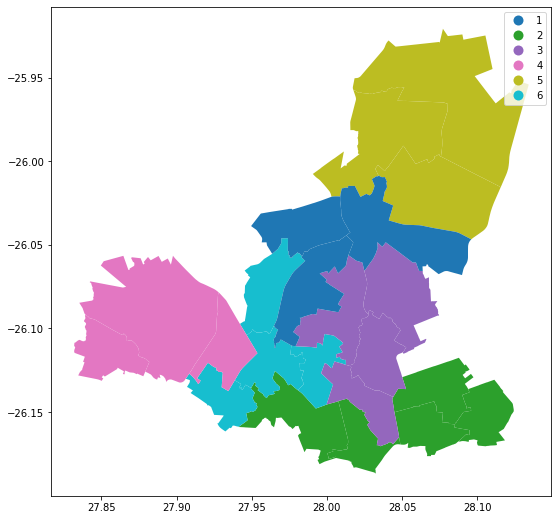

             formal_dwellings  White     Pop  Employed     area_km
cluster_pop                                                       
1                       39015  57613  100835     60690   59.541932
2                       38445  58369  113083     58687   61.498893
3                       44349  61696  111712     62631   62.223500
4                       35453  63805  103680     58384   70.905449
5                       39541  37266  102265     61502  117.215101
6                       36257  57964  103192     57441   44.082049


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


In [345]:
df_fdw = calc_cluster_maxp(df, w, attrs_name, threshold_name_hsld, threshold_value, top_n)

In [347]:
df_fdw_2 = calc_cluster_maxp(df, w, attrs_name, threshold_name_hsld, threshold_value, 2)

KeyboardInterrupt: 

### по числу рабочего населения

In [375]:
# input 2
top_n = 3
# gdf_fin_cpt_jhb_wrd_bests["count"] = 1
threshold_name_empl = "Employed"
attrs_name = ["index"]

df = gdf_fin_cpt_jhb_wrd_bests[(gdf_fin_cpt_jhb_wrd_bests['CAT_B']=='JHB')& (gdf_fin_cpt_jhb_wrd_bests['WARD_ID'].isin(['79800023','79800054'])==False)][['index','geometry',"formal_dwellings",'White','Employed','Pop','area_km']]

w =  libpysal.weights.Rook.from_dataframe(df)

threshold_value = 35000

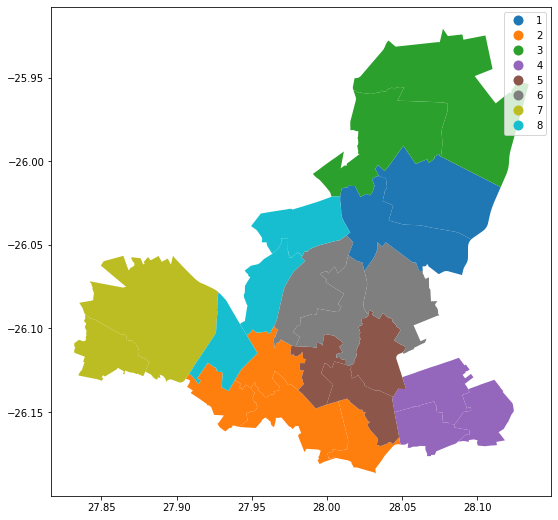

             formal_dwellings  White    Pop  Employed    area_km
cluster_pop                                                     
1                       23989  30809  58314     35388  56.960249
2                       31490  49090  93015     50390  48.692121
3                       29897  26257  78408     46801  86.508352
4                       24621  35782  72128     36651  34.608549
5                       24468  38296  62549     35817  34.267317
6                       37395  50671  98704     55117  54.491418
7                       26053  46040  75428     41940  59.136836
8                       35147  59768  96221     57231  40.802082


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


In [376]:
clust_desc_employed = calc_cluster_maxp(df, w, attrs_name, threshold_name_empl, threshold_value, top_n)

In [387]:
clust_geom = clust_desc_employed[['cluster_pop','geometry']].dissolve(by='cluster_pop', aggfunc='sum')

clust_desc_employed_gr  = clust_desc_employed.groupby('cluster_pop')['formal_dwellings','White','Pop','Employed','area_km'].sum().reset_index().merge(
clust_geom.reset_index(), on='cluster_pop')

<AxesSubplot:>

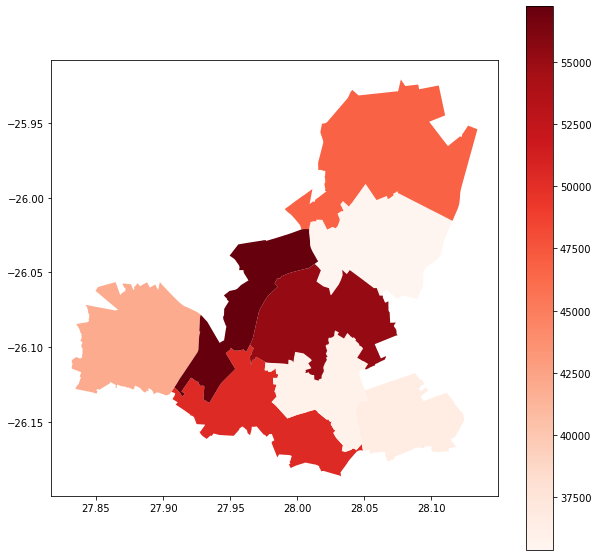

In [395]:
clust_desc_employed_gr.plot(column='Employed',cmap='Reds', label='cluster_pop', figsize=(10,10), legend=True)

In [409]:
clust_desc_employed_gr.to_file('clust_desc_employed_gr.geojson', driver='GeoJSON')

In [403]:
#30 км в час
print(30/(60/12),'расстояние с cte 20 мин') #12 мин
print(3.14*(3**2+2**2), 'площадь') 

6.0 расстояние с cte 20 мин
40.82 площадь


In [404]:
# input 3
top_n = 2
# gdf_fin_cpt_jhb_wrd_bests["count"] = 1
threshold_name_area = "area_km"
attrs_name = ["index"]

df = gdf_fin_cpt_jhb_wrd_bests[(gdf_fin_cpt_jhb_wrd_bests['CAT_B']=='JHB')& (gdf_fin_cpt_jhb_wrd_bests['WARD_ID'].isin(['79800023','79800054'])==False)][['index','geometry',"formal_dwellings",'White','Employed','Pop','area_km']]

w =  libpysal.weights.Rook.from_dataframe(df)

threshold_value = 40

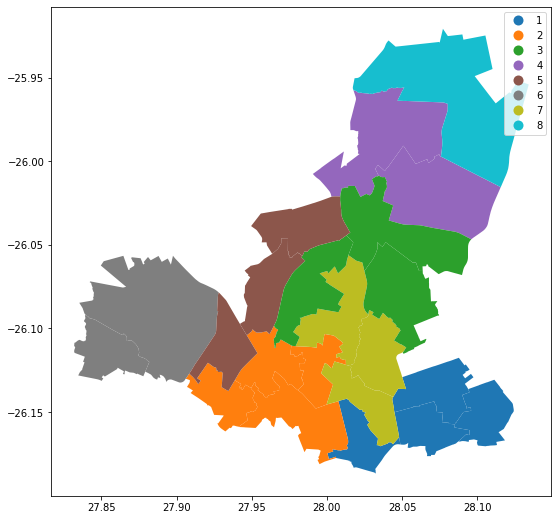

             formal_dwellings  White     Pop  Employed    area_km
cluster_pop                                                      
1                       29974  45092   88832     45523  43.875180
2                       33021  52501   96429     52633  48.179901
3                       40212  53784  100286     58308  64.374971
4                       17908  24647   44487     26988  63.004116
5                       35147  59768   96221     57231  40.802082
6                       26053  46040   75428     41940  59.136836
7                       29112  42262   75306     42198  41.882853
8                       21633  12619   57778     34514  54.210985


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [405]:
clust_desc_area= calc_cluster_maxp(df, w, attrs_name, threshold_name_area, threshold_value, top_n)

In [407]:
clust_desc_area.to_file('clust_desc_area_gr.geojson', driver='GeoJSON')

In [408]:
clust_desc_area

,cluster_pop,formal_dwellings,White,Pop,Employed,area_km,geometry
0,1,29974,45092,88832,45523,43.875180,"POLYGON ((28.09601 -26.04677, 28.09564 -26.047..."
1,2,33021,52501,96429,52633,48.179901,"POLYGON ((28.01435 -26.14256, 28.01451 -26.142..."
2,3,40212,53784,100286,58308,64.374971,"POLYGON ((28.07578 -25.99720, 28.07548 -25.997..."
3,4,17908,24647,44487,26988,63.004116,"POLYGON ((28.08749 -26.16750, 28.08739 -26.167..."
4,5,35147,59768,96221,57231,40.802082,"POLYGON ((28.04398 -26.14119, 28.04379 -26.141..."
5,6,26053,46040,75428,41940,59.136836,"POLYGON ((28.02760 -26.09165, 28.02760 -26.091..."
6,7,29112,42262,75306,42198,41.882853,"POLYGON ((27.87916 -26.12588, 27.87907 -26.126..."
7,8,21633,12619,57778,34514,54.210985,"POLYGON ((27.94480 -26.12285, 27.94404 -26.123..."


In [410]:
borders_jhb = gpd.read_file('borders_jhb.geojson')

In [433]:
def get_h3_net (city_boarders,scale ):
    """Create a h3 net for  given city borders.
    borders type : [[]]
    """
    pass
    boarders_gjson= { 
                    "type": "Polygon",
                    "coordinates": [
                       city_boarders 
                    ] 
                }
    hexs = h3.polyfill(boarders_gjson, res=scale,geo_json_conformant = True)
    
    polygonise = lambda hex_id: Polygon(\
                            h3.h3_to_geo_boundary(
                            hex_id, geo_json=True)
                                        )
    
    # %time all_polys = gpd.GeoSeries(list(map(polygonise, hexs)), \
    #                                       index=hexs, \
    #                                       crs="EPSG:4326" \
    #                                      )
    
    gdf_hex = gpd.GeoDataFrame(list(map(polygonise, hexs)), \
                                          index=hexs, \
                                          crs="EPSG:4326", \
                     columns=['geometry']\
                                         )
    #     fig, ax=plt.subplots(figsize=(13,10))
    #     gdf_hex.plot(alpha=0.5, linewidth=1, ax=ax)
    #     ctx.add_basemap(ax=ax, crs='epsg:4326')
    #     plt.show()
   
    return gdf_hex

import h3

df_hex_jhb = get_h3_net(borders_jhb.iloc[0].geometry.boundary.coords,10).reset_index()

df_hex_jhb

df_hex_jhb_bests = gpd.sjoin(df_hex_jhb, pop_grid_best_wards[['geometry','pop']],op='intersects',how='inner' )

In [531]:
df_hex_jhb_bests_gr = df_hex_jhb_bests.dissolve(by = 'index',aggfunc='sum')

In [533]:
df_hex_jhb_bests_gr.reset_index(inplace=True)

In [534]:
df_hex_jhb_bests_gr

,index,geometry,index_right,pop
0,87bcc3400ffffff,"POLYGON ((28.01466 -26.00823, 28.00202 -26.000...",1729880,5610
1,87bcc3401ffffff,"POLYGON ((27.97675 -25.98635, 27.99023 -25.980...",78532,313
2,87bcc3402ffffff,"POLYGON ((28.04246 -25.98316, 28.02898 -25.989...",1050889,1636
3,87bcc3403ffffff,"POLYGON ((28.01634 -25.98179, 28.00286 -25.987...",9154,4
4,87bcc3404ffffff,"POLYGON ((28.01466 -26.00823, 28.02814 -26.002...",5010404,15257
...,...,...,...,...
111,87bcc3cf0ffffff,"POLYGON ((28.04843 -26.30140, 28.04927 -26.288...",23375015,12047
112,87bcc3cf1ffffff,"POLYGON ((28.04843 -26.30140, 28.03493 -26.307...",5690480,2709
113,87bcc3cf3ffffff,"POLYGON ((28.03661 -26.28094, 28.03745 -26.267...",19854042,9858
114,87bcc3cf4ffffff,"POLYGON ((28.07291 -26.32913, 28.06025 -26.321...",6342411,2851


,level_0,index,geometry,index_right,pop
0,0,87bcc3400ffffff,"POLYGON ((28.01466 -26.00823, 28.00202 -26.000...",1729880,5610
1,1,87bcc3401ffffff,"POLYGON ((27.97675 -25.98635, 27.99023 -25.980...",78532,313
2,2,87bcc3402ffffff,"POLYGON ((28.04246 -25.98316, 28.02898 -25.989...",1050889,1636
3,3,87bcc3403ffffff,"POLYGON ((28.01634 -25.98179, 28.00286 -25.987...",9154,4
4,4,87bcc3404ffffff,"POLYGON ((28.01466 -26.00823, 28.02814 -26.002...",5010404,15257
...,...,...,...,...,...
111,111,87bcc3cf0ffffff,"POLYGON ((28.04843 -26.30140, 28.04927 -26.288...",23375015,12047
112,112,87bcc3cf1ffffff,"POLYGON ((28.04843 -26.30140, 28.03493 -26.307...",5690480,2709
113,113,87bcc3cf3ffffff,"POLYGON ((28.03661 -26.28094, 28.03745 -26.267...",19854042,9858
114,114,87bcc3cf4ffffff,"POLYGON ((28.07291 -26.32913, 28.06025 -26.321...",6342411,2851


In [543]:
# input 3
top_n = 4
# gdf_fin_cpt_jhb_wrd_bests["count"] = 1
threshold_name = "pop"
attrs_name = ["level_0"]

df = df_hex_jhb_bests_gr
df = df.reset_index()

w =  libpysal.weights.Rook.from_dataframe(df)

threshold_value = 50000

/usr/local/lib/python3.7/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [1]:
df

NameError: name 'df' is not defined

<AxesSubplot:>

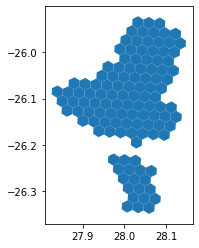

In [536]:
df.plot()

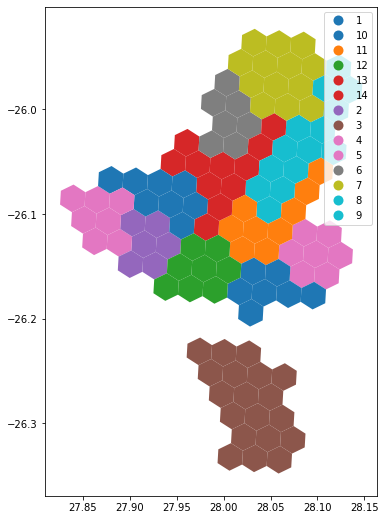

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


KeyError: "Columns not found: 'Pop', 'area_km', 'White', 'formal_dwellings', 'Employed'"

In [544]:
clust_desc_pop= calc_cluster_maxp(df, w, attrs_name, threshold_name, threshold_value, top_n)

### Кейптаун

In [445]:
# input 4
top_n = 1
# gdf_fin_cpt_jhb_wrd_bests["count"] = 1
threshold_name_hsld = "formal_dwellings"
attrs_name = ["index"]

df = gdf_fin_cpt_jhb_wrd_bests[(gdf_fin_cpt_jhb_wrd_bests['CAT_B']=='CPT')&(gdf_fin_cpt_jhb_wrd_bests['WARD_ID'].isin(['19100023','19100107','19100015','19100084'])==False)][['index','geometry',"formal_dwellings",'White','Employed','Pop','area_km']]



/usr/local/lib/python3.7/dist-packages/libpysal/weights/_contW_lists.py:31: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(_get_boundary_points(part.boundary) for part in shape)))
/usr/local/lib/python3.7/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [488]:
w =  libpysal.weights.Rook.from_dataframe(df)

threshold_value = 20000

/usr/local/lib/python3.7/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [451]:
df[df.geometry.centroid.x==df.geometry.centroid.x.min()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


,index,geometry,formal_dwellings,White,Employed,Pop,area_km
183,183,"MULTIPOLYGON (((18.41515 -33.89914, 18.41514 -...",12903,18494,13318,27903,15.210237


In [459]:
df.loc[183,'geometry'] = df.loc[183,'geometry'][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

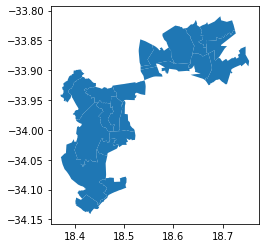

In [487]:
df.plot()

In [489]:
clust_desc_cpt_dwh = calc_cluster_maxp(df, w, attrs_name, threshold_name_hsld, threshold_value, top_n)

KeyboardInterrupt: 

<Figure size 720x648 with 0 Axes>

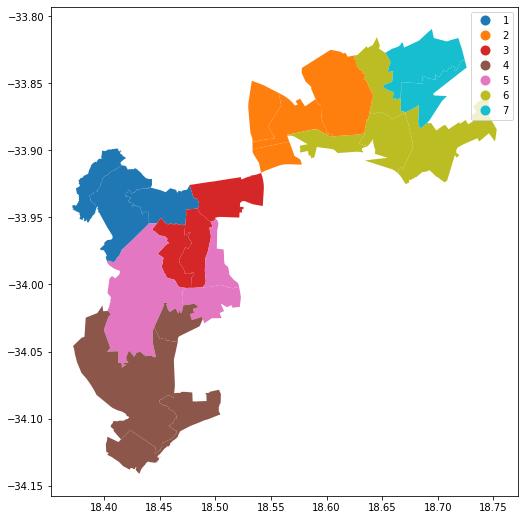

             formal_dwellings  White     Pop  Employed    area_km
cluster_pop                                                      
1                       33595  42265   89231     38847  50.251190
2                       34104  68840  104599     49583  57.661759
3                       29602  41671   81385     35937  37.673964
4                       26283  46395   76717     33903  81.378972
5                       24136  20655   84383     36731  62.858418
6                       38641  79140  116852     56884  61.334965
7                       23755  52489   68347     36209  31.030203


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [496]:
# input 5
top_n = 1
# gdf_fin_cpt_jhb_wrd_bests["count"] = 1
threshold_name_empl = "Employed"
attrs_name = ["index"]

threshold_value = 30000

clust_desc_cpt_empl = calc_cluster_maxp(df, w, attrs_name, threshold_name_empl, threshold_value, top_n)

In [500]:
clust_desc_cpt_empl['dwl_density']= clust_desc_cpt_empl['formal_dwellings']/clust_desc_cpt_empl['area_km']

In [501]:
clust_desc_cpt_empl['dwl_density']

0    668.541385
1    591.449180
2    785.741588
3    322.970413
4    383.974028
5    629.999540
6    765.544466
Name: dwl_density, dtype: float64

In [502]:
clust_desc_cpt_empl.to_file('clust_desc_cpt_empl.geojson', driver='GeoJSON')

<AxesSubplot:>

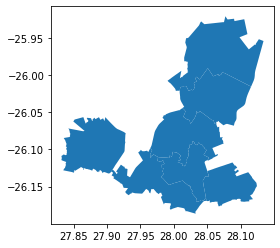

In [485]:
clust_desc_cpt_dwh.plot()

In [471]:
clust_desc_cpt_dwh['dwl_density'].mean()

591.0313766166372

In [468]:
clust_desc_employed_gr['dwl_density']= clust_desc_employed_gr['formal_dwellings']/clust_desc_employed_gr['area_km']

In [504]:
# Йоханнесбург
clust_desc_employed_gr.sort_values(by=['formal_dwellings'], ascending=False).head(5)[['area_km','formal_dwellings','Employed']]

,area_km,formal_dwellings,Employed
5,54.491418,37395,55117
7,40.802082,35147,57231
1,48.692121,31490,50390
2,86.508352,29897,46801
6,59.136836,26053,41940


In [505]:
# Кейптаун
clust_desc_cpt_empl.sort_values(by=['formal_dwellings'], ascending=False).head(5)[['area_km','formal_dwellings','Employed']]

,area_km,formal_dwellings,Employed
5,61.334965,38641,56884
1,57.661759,34104,49583
0,50.251190,33595,38847
2,37.673964,29602,35937
3,81.378972,26283,33903


<AxesSubplot:>

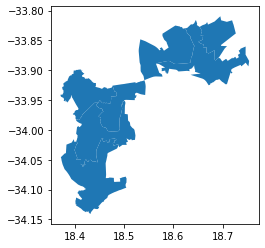

In [499]:
clust_desc_cpt_empl.plot()

In [494]:
clust_desc_cpt_empl

,cluster_pop,formal_dwellings,White,Pop,Employed,area_km,geometry
0,1,33595,42265,89231,38847,50.251190,"POLYGON ((28.09601 -26.04677, 28.09564 -26.047..."
1,2,34104,68840,104599,49583,57.661759,"POLYGON ((28.01435 -26.14256, 28.01451 -26.142..."
2,3,29602,41671,81385,35937,37.673964,"POLYGON ((28.07578 -25.99720, 28.07548 -25.997..."
3,4,26283,46395,76717,33903,81.378972,"POLYGON ((28.08749 -26.16750, 28.08739 -26.167..."
4,5,24136,20655,84383,36731,62.858418,"POLYGON ((28.04398 -26.14119, 28.04379 -26.141..."
5,6,38641,79140,116852,56884,61.334965,"POLYGON ((28.02760 -26.09165, 28.02760 -26.091..."
6,7,23755,52489,68347,36209,31.030203,"POLYGON ((27.87916 -26.12588, 27.87907 -26.126..."


In [545]:
clust_desc_employed_gr

,cluster_pop,formal_dwellings,White,Pop,Employed,area_km,geometry,dwl_density
0,1,23989,30809,58314,35388,56.960249,"POLYGON ((28.09601 -26.04677, 28.09564 -26.047...",421.153353
1,2,31490,49090,93015,50390,48.692121,"POLYGON ((28.01435 -26.14256, 28.01451 -26.142...",646.716545
2,3,29897,26257,78408,46801,86.508352,"POLYGON ((28.07578 -25.99720, 28.07548 -25.997...",345.596688
3,4,24621,35782,72128,36651,34.608549,"POLYGON ((28.08749 -26.16750, 28.08739 -26.167...",711.413818
4,5,24468,38296,62549,35817,34.267317,"POLYGON ((28.04398 -26.14119, 28.04379 -26.141...",714.033151
5,6,37395,50671,98704,55117,54.491418,"POLYGON ((28.02760 -26.09165, 28.02760 -26.091...",686.254850
6,7,26053,46040,75428,41940,59.136836,"POLYGON ((27.87916 -26.12588, 27.87907 -26.126...",440.554511
7,8,35147,59768,96221,57231,40.802082,"POLYGON ((27.94480 -26.12285, 27.94404 -26.123...",861.402129


In [ ]:
## Upload isochrones

In [547]:
gdf_iso = gpd.read_file('isochrones_4loc_joburg.geojson')

In [556]:
gdf_iso.head()

,group_index,value,center,area,reachfactor,total_pop,id,layer,path,geometry
0,0,720,"(2:28.05972960839568,-26.0606657014103)",9.815367e+07,0.0781,162594,0,Aldeia Rivonia_12_min_isochrone,/Users/intra26/Desktop/лавка/заграница/South a...,"POLYGON ((27.96366 -26.09718, 27.96677 -26.098..."
1,0,720,"(2:28.02360003204948,-26.05936695327426)",1.079688e+08,0.0859,217190,0,Bryanston carvenience_12min_isochrone,/Users/intra26/Desktop/лавка/заграница/South a...,"POLYGON ((27.94114 -26.12442, 27.94396 -26.126..."
2,0,720,"(2:28.02737898266612,-26.0752000167087)",1.108416e+08,0.0882,219493,0,Bryanston Shopping Centre_12m_isochrone,/Users/intra26/Desktop/лавка/заграница/South a...,"POLYGON ((27.96454 -26.09565, 27.96776 -26.097..."
3,0,720,"(2:28.07982996607706,-26.10771130247793)",1.032065e+08,0.0821,397263,0,wyberg_12min_isochrone,/Users/intra26/Desktop/лавка/заграница/South a...,"POLYGON ((28.03117 -26.18243, 28.03152 -26.183..."


In [552]:
pop_grid_best_wards=gf.get_gdf(pop_grid_best_wards, 'geometry', 4326)

In [555]:
gdf_iso_pop_raw = gpd.sjoin(gdf_iso,pop_grid_best_wards[pop_grid_best_wards['CAT_B']=='JHB'][['index','pop','geometry']], how='inner', op='contains')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [565]:
gdf_iso_pop_raw.head()

,group_index,value,center,area,reachfactor,total_pop,id,layer,path,geometry,index_right,index,pop
0,0,720,"(2:28.05972960839568,-26.0606657014103)",9.815367e+07,0.0781,162594,0,Aldeia Rivonia_12_min_isochrone,/Users/intra26/Desktop/лавка/заграница/South a...,"POLYGON ((27.96366 -26.09718, 27.96677 -26.098...",25829,45778,3
1,0,720,"(2:28.02360003204948,-26.05936695327426)",1.079688e+08,0.0859,217190,0,Bryanston carvenience_12min_isochrone,/Users/intra26/Desktop/лавка/заграница/South a...,"POLYGON ((27.94114 -26.12442, 27.94396 -26.126...",25829,45778,3
2,0,720,"(2:28.02737898266612,-26.0752000167087)",1.108416e+08,0.0882,219493,0,Bryanston Shopping Centre_12m_isochrone,/Users/intra26/Desktop/лавка/заграница/South a...,"POLYGON ((27.96454 -26.09565, 27.96776 -26.097...",25829,45778,3
0,0,720,"(2:28.05972960839568,-26.0606657014103)",9.815367e+07,0.0781,162594,0,Aldeia Rivonia_12_min_isochrone,/Users/intra26/Desktop/лавка/заграница/South a...,"POLYGON ((27.96366 -26.09718, 27.96677 -26.098...",25816,45765,11
1,0,720,"(2:28.02360003204948,-26.05936695327426)",1.079688e+08,0.0859,217190,0,Bryanston carvenience_12min_isochrone,/Users/intra26/Desktop/лавка/заграница/South a...,"POLYGON ((27.94114 -26.12442, 27.94396 -26.126...",25816,45765,11


In [560]:
gdf_iso_pop = gdf_iso_pop_raw.groupby('layer')['pop'].sum().reset_index()

In [561]:
gdf_iso_pop

,layer,pop
0,Aldeia Rivonia_12_min_isochrone,124458
1,Bryanston Shopping Centre_12m_isochrone,212087
2,Bryanston carvenience_12min_isochrone,202623
3,wyberg_12min_isochrone,90267


In [580]:
gdf_iso_pop.sort_values('pop', ascending=False)

,layer,pop
1,Bryanston Shopping Centre_12m_isochrone,212087
2,Bryanston carvenience_12min_isochrone,202623
0,Aldeia Rivonia_12_min_isochrone,124458
3,wyberg_12min_isochrone,90267


In [581]:
dict_uniq_pop={}
set_unique_index=set()

for n, l in enumerate(gdf_iso_pop.sort_values('pop', ascending=False)['layer'].values):
    print(n)
    if n==0:
        dict_uniq_pop[l]= gdf_iso_pop_raw[gdf_iso_pop_raw.layer==l]['pop'].sum()
        set_unique_index.update(gdf_iso_pop_raw[gdf_iso_pop_raw.layer==l]['index_right'].values)
    else:
        index_new = gdf_iso_pop_raw[(gdf_iso_pop_raw.layer==l)&(gdf_iso_pop_raw['index_right'].isin(set_unique_index)==False)]['index_right'].values
        dict_uniq_pop[l] = gdf_iso_pop_raw.loc[ gdf_iso_pop_raw.index_right.isin(index_new)]['pop'].sum()
        set_unique_index.update(index_new)

In [583]:
dict_uniq_pop

{'Bryanston Shopping Centre_12m_isochrone': 212087,
 'Bryanston carvenience_12min_isochrone': 36515,
 'Aldeia Rivonia_12_min_isochrone': 23628,
 'wyberg_12min_isochrone': 69709}

In [584]:
gdf_iso_pop['add_covered_audience']= gdf_iso_pop['layer'].map(dict_uniq_pop)

In [588]:
gdf_iso_desc = gdf_iso.merge(gdf_iso_pop, on='layer')
#.to_file('4loc_joburg_iso_pop.geojson', driver='GeoJSON')

In [594]:
gdf_iso_desc.loc[0:0].to_file('Aldeia Rivonia_12_min_isochrone.geojson', driver='GeoJSON')

In [597]:
gdf_iso_desc.loc[1:1].to_file('Bryanston carvenience_12min_isochrone.geojson', driver='GeoJSON')

In [596]:
gdf_iso_desc.loc[1:2]

,group_index,value,center,area,reachfactor,total_pop,id,layer,path,geometry,pop,add_covered_audience
1,0,720,"(2:28.02360003204948,-26.05936695327426)",1.079688e+08,0.0859,217190,0,Bryanston carvenience_12min_isochrone,/Users/intra26/Desktop/лавка/заграница/South a...,"POLYGON ((27.94114 -26.12442, 27.94396 -26.126...",202623,36515
2,0,720,"(2:28.02737898266612,-26.0752000167087)",1.108416e+08,0.0882,219493,0,Bryanston Shopping Centre_12m_isochrone,/Users/intra26/Desktop/лавка/заграница/South a...,"POLYGON ((27.96454 -26.09565, 27.96776 -26.097...",212087,212087


In [598]:
gdf_iso_desc.loc[2:2].to_file('Bryanston Shopping Centre_12m_isochrone.geojson', driver='GeoJSON')

In [600]:
gdf_iso_desc.loc[3:3].to_file('wyberg_12min_isochrone.geojson', driver='GeoJSON')

In [601]:
gdf_new_zones = gpd.read_file('joburg_zones_0702.geojson')

In [608]:
gdf_new_zones = pd.concat([gdf_iso.loc[1:1],gdf_new_zones])

In [620]:
gdf_new_zones.reset_index(inplace=True)

In [631]:
pop_grid_best_wards.shape

(57620, 10)

In [45]:
def receive_gdf_zone_pop(gdf_new_zones,pop_grid_best_wards):

    gdf_new_zones_pop_raw = gpd.sjoin(gdf_new_zones,pop_grid_best_wards[pop_grid_best_wards['CAT_B']=='JHB'][['index','pop','geometry']], how='inner', op='contains')
    gdf_iso_pop = gdf_new_zones_pop_raw.groupby('layer')['pop'].sum().reset_index()
    
    dict_uniq_pop={}
    set_unique_index=set()

    for n, l in enumerate( gdf_new_zones.sort_values('steps', ascending=True)['layer'].values):
        print(n)
        if n==0:
            dict_uniq_pop[l]= gdf_new_zones_pop_raw[gdf_new_zones_pop_raw.layer==l]['pop'].sum()
            set_unique_index.update(gdf_new_zones_pop_raw[gdf_new_zones_pop_raw.layer==l]['index_right'].values)
            print(l,'len(set_unique_index)',len(set_unique_index))
        else:
            index_new = gdf_new_zones_pop_raw[(gdf_new_zones_pop_raw.layer==l)&(gdf_new_zones_pop_raw['index_right'].isin(set_unique_index)==False)]['index_right'].values
            print(l, 'len index_new', len(index_new))
            dict_uniq_pop[l] = gdf_new_zones_pop_raw.loc[(gdf_new_zones_pop_raw.index_right.isin(index_new))&(gdf_new_zones_pop_raw.layer==l)]['pop'].sum()
            set_unique_index.update(index_new)
            
    gdf_iso_pop['add_covered_audience']= gdf_iso_pop['layer'].map(dict_uniq_pop)
    gdf_new_zones_desc = gdf_new_zones.merge(gdf_iso_pop, on='layer')
    return gdf_new_zones_desc

In [638]:
pop_grid_best_wards.rename(columns={'index':'grid_id'}, inplace=True)

In [655]:
gdf_new_zones_pop_raw = gpd.sjoin(gdf_new_zones,pop_grid_best_wards[pop_grid_best_wards['CAT_B']=='JHB'][['grid_id','pop','geometry']], how='inner', op='contains')
gdf_iso_pop = gdf_new_zones_pop_raw.groupby('layer')['pop'].sum().reset_index()

dict_uniq_pop={}
set_unique_index=set()



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [656]:
gdf_iso_pop = gdf_iso_pop.sort_values('pop', ascending=False)

In [658]:
dict_uniq_pop

{'joburg_zone1_0702': 230743,
 'Bryanston carvenience_12min_isochrone': 227369,
 'joburg_zone3_0702': 98372,
 'joburg_zone2_0702': 29424,
 'ors-export-polygon-4': 19169}

In [672]:
gdf_new_zones_desc.loc[0,'add_covered_audience']=118215

In [674]:
gdf_new_zones_desc[gdf_new_zones_desc.columns[:-1]].to_file('gdf_new_zones_desc.geojson', driver='GeoJSON')

In [670]:
gdf_new_zones_desc[['pop','add_covered_audience']]

,pop,add_covered_audience
0,202623,227369
1,230743,230743
2,105398,29424
3,139560,98372
4,30974,19169


In [25]:
gdf_new_zones_3z=gpd.read_file('3zones_Joburg.geojson')

In [21]:
pop_grid_best_wards = pop_grid_best_wards.reset_index()

In [27]:
gdf_new_zones_3z.loc[1,'layer'] = "Eagle's centre"
gdf_new_zones_3z.loc[2,'layer'] = 'Linden'

In [29]:
gdf_new_zones_3z.layer.unique()

array(['Bryanston carvenience_12min_isochrone', "Eagle's centre",
       'Linden'], dtype=object)

In [30]:
dict_stepts = dict(zip(['Bryanston carvenience_12min_isochrone', "Eagle's centre",
       'Linden'],[1,2,3]))

In [31]:
gdf_new_zones_3z['steps'] = gdf_new_zones_3z.layer.map(dict_stepts )
gdf_new_zones_3z

,group_index,value,center,area,reachfactor,total_pop,id,layer,path,pop,add_covered_audience,geometry,steps
0,0,720,"(2:28.02360003204948,-26.05936695327426)",1.079688e+08,0.0859,217190,0,Bryanston carvenience_12min_isochrone,/Users/intra26/Desktop/лавка/заграница/South a...,202623.0,36515.0,"POLYGON ((27.94114 -26.12442, 27.94396 -26.126...",1
1,0,720,"(2:27.92757621771397,-26.09585333749305)",1.310233e+08,0.1043,276885,0,Eagle's centre,None,NaN,NaN,"POLYGON ((27.85571 -26.12060, 27.86357 -26.128...",2
2,0,720,"(2:27.98766542627254,-26.13105663859045)",1.252459e+08,0.0997,317081,0,Linden,None,NaN,NaN,"POLYGON ((27.91662 -26.15269, 27.91741 -26.153...",3


In [46]:

gdf_zones3_results = receive_gdf_zone_pop(gdf_new_zones_3z[['geometry','layer','steps']],pop_grid_best_wards)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3457: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


0
Bryanston carvenience_12min_isochrone len(set_unique_index) 11021
1
Eagle's centre len index_new 7912
2
Linden len index_new 6262


In [59]:

gdf_zones3_results

,geometry,layer,steps,pop,add_covered_audience
0,"POLYGON ((27.94114 -26.12442, 27.94396 -26.126...",Bryanston carvenience_12min_isochrone,1,202623,202623
1,"POLYGON ((27.85571 -26.12060, 27.86357 -26.128...",Eagle's centre,2,168244,156431
2,"POLYGON ((27.91662 -26.15269, 27.91741 -26.153...",Linden,3,239641,136413


In [49]:
gdf_zones_Joburg_dissolved = gpd.read_file('3zones_Joburg_dissolved.geojson')

In [58]:
gpd.sjoin(gdf_zones_Joburg_dissolved[['layer','geometry']], pop_grid_best_wards.drop('index_right', axis=1), op='intersects')['pop'].sum()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


506167

In [66]:
gdf_new_zones_3z['center']=gdf_new_zones_3z['center'].apply(lambda x: Point([float(v) for v in x[3:-1].split(',')]))

In [69]:
gdf_new_zones_3z_stores = gpd.GeoDataFrame(gdf_new_zones_3z[['center','layer']], geometry='center',crs='epsg:4326')

In [70]:
gdf_new_zones_3z_stores.to_file('gdf_new_zones_3z_stores.geojson', driver='GeoJSON')

In [ ]:
gdf_new_zones_3z_stores